## Trabalhando com Big Data - 25 Milhões de Registros
fonte: https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd

In [2]:
!pwd

/Users/valencar/Dropbox/AULAS-REMOTAS/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/Python-Para-Analise-de-Dados/MANHA


In [3]:
!ls -ilah /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m

total 5212696
8852112067 drwxr-xr-x@ 16 valencar  staff   512B Feb  3 04:05 .
8753341664 drwxr-xr-x@ 32 valencar  staff   1.0K Feb  3 04:04 ..
8852135013 -rw-r--r--@  1 valencar  staff   6.0K Dec 21 16:32 .DS_Store
8852112072 -rw-r--r--@  1 valencar  staff    10K Oct 17  2016 README.txt
8852115885 -rw-r--r--@  1 valencar  staff   1.1M Dec 20 17:50 filmes-ratings.csv
8860047286 -rw-r--r--@  1 valencar  staff   277M Feb  3 01:59 filmes.pbix
8852133601 -rw-r--r--@  1 valencar  staff    46K Dec 20 21:38 filmes2.csv
8859960005 -rw-r-----@  1 valencar  staff   1.1G Dec 20 22:20 filmes4.csv
8852142504 -rw-r--r--@  1 valencar  staff   287M Dec 21 05:20 filmes4.csv.zip
8852112073 -rw-r--r--@  1 valencar  staff   309M Oct 17  2016 genome-scores.csv
8852112070 -rw-r--r--@  1 valencar  staff    18K Oct 17  2016 genome-tags.csv
8852112068 -rw-r--r--@  1 valencar  staff   557K Oct 17  2016 links.csv
8852445227 -rw-r--r--@  1 valencar  staff   2.3K Dec 24 23:22 ml-20m.sql
8852112074 -rw-r--r--@  1 va

In [4]:
!head /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/movies.csv

In [ ]:
#!unzip /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/filmes4.csv.zip 

In [ ]:
#!mv filmes4.csv /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/

In [5]:
url = '/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m' + '/' + 'ratings.csv'
url

'/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/ratings.csv'

In [6]:
%time

dfratings = pd.read_csv(url)
print('total de registros: {:,d}'.format(len(dfratings)))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
total de registros: 20,000,263


In [7]:
dfratings.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [8]:
url = '/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m' + '/' + 'movies.csv'
url

'/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/movies.csv'

In [24]:
%time

dfmovies = pd.read_csv(url)
print('total de registros: {:,d}'.format(len(dfmovies)))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs
total de registros: 27,278


In [25]:
dfmovies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [26]:
%%time

dfdrama_acao = dfmovies[ dfmovies.genres.str.contains('Drama') |  dfmovies.genres.str.contains('Action') ]
print('total de registros: {:,d}'.format(len(dfdrama_acao)))
dfdrama_acao.head()

total de registros: 15,661
CPU times: user 23.4 ms, sys: 2.22 ms, total: 25.6 ms
Wall time: 27.1 ms


movieId                           title                     genres
3         4        Waiting to Exhale (1995)       Comedy|Drama|Romance
5         6                     Heat (1995)      Action|Crime|Thriller
8         9             Sudden Death (1995)                     Action
9        10                GoldenEye (1995)  Action|Adventure|Thriller
10       11  American President, The (1995)       Comedy|Drama|Romance

# Obter todos os generos

In [27]:
genres = 'Comedy|Drama|Romance'
generos = genres.split('|')
generos

['Comedy', 'Drama', 'Romance']

In [28]:
%%time

set_generos = set()

for index, row in dfmovies.iterrows(): 
    generos = row['genres'].split('|')
    set_generos.update(generos)
    
generos = list(set_generos)
print('numero de generos',len(generos))
print(generos)

numero de generos 20
['Horror', 'Western', 'Crime', 'Thriller', 'Drama', '(no genres listed)', 'Mystery', 'Film-Noir', 'Comedy', 'Romance', 'Musical', 'Children', 'Sci-Fi', 'Fantasy', 'War', 'Action', 'Documentary', 'Animation', 'Adventure', 'IMAX']
CPU times: user 846 ms, sys: 7.1 ms, total: 853 ms
Wall time: 859 ms


## Criando colunas Genero - individuais

In [29]:
%%time

for genero in generos:
    dfmovies[genero] = False
    
dfmovies.head()

CPU times: user 4.62 ms, sys: 162 µs, total: 4.78 ms
Wall time: 4.81 ms


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Horror  Western  Crime  \
0  Adventure|Animation|Children|Comedy|Fantasy   False    False  False   
1                   Adventure|Children|Fantasy   False    False  False   
2                               Comedy|Romance   False    False  False   
3                         Comedy|Drama|Romance   False    False  False   
4                                       Comedy   False    False  False   

   Thriller  Drama  (no genres listed)  Mystery  ...  Musical  Children  \
0     False  False               False    False  ...    False     False   
1     False  False               False    False  ...    False     False   
2     False  False               False    False  ...    False     False   
3     False  False               False    False  ...    False     False   
4     False  False               False    False  ...    False     False   

   Sci-Fi  Fantasy    War  Action  Documentary  Animation  Adventure   IMAX  
0   False    False  False   False        False      False      False  False  
1   False    False  False   False        False      False      False  False  
2   False    False  False   False        False      False      False  False  
3   False    False  False   False        False      False      False  False  
4   False    False  False   False        False      False      False  False  

[5 rows x 23 columns]

In [30]:
%%time 

for index, row in dfmovies.iterrows(): 
    generos = row['genres'].split('|')
    for genero in generos:
        dfmovies.at[index, genero] = True
    
dfmovies.head()

CPU times: user 1.48 s, sys: 10.5 ms, total: 1.49 s
Wall time: 1.51 s


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  Horror  Western  Crime  \
0  Adventure|Animation|Children|Comedy|Fantasy   False    False  False   
1                   Adventure|Children|Fantasy   False    False  False   
2                               Comedy|Romance   False    False  False   
3                         Comedy|Drama|Romance   False    False  False   
4                                       Comedy   False    False  False   

   Thriller  Drama  (no genres listed)  Mystery  ...  Musical  Children  \
0     False  False               False    False  ...    False      True   
1     False  False               False    False  ...    False      True   
2     False  False               False    False  ...    False     False   
3     False   True               False    False  ...    False     False   
4     False  False               False    False  ...    False     False   

   Sci-Fi  Fantasy    War  Action  Documentary  Animation  Adventure   IMAX  
0   False     True  False   False        False       True       True  False  
1   False     True  False   False        False      False       True  False  
2   False    False  False   False        False      False      False  False  
3   False    False  False   False        False      False      False  False  
4   False    False  False   False        False      False      False  False  

[5 rows x 23 columns]

In [32]:
dfmovies.Drama.value_counts()

False    13934
True     13344
Name: Drama, dtype: int64

In [33]:
del dfmovies['genres']
dfmovies.head()

movieId                               title  Horror  Western  Crime  \
0        1                    Toy Story (1995)   False    False  False   
1        2                      Jumanji (1995)   False    False  False   
2        3             Grumpier Old Men (1995)   False    False  False   
3        4            Waiting to Exhale (1995)   False    False  False   
4        5  Father of the Bride Part II (1995)   False    False  False   

   Thriller  Drama  (no genres listed)  Mystery  Film-Noir  ...  Musical  \
0     False  False               False    False      False  ...    False   
1     False  False               False    False      False  ...    False   
2     False  False               False    False      False  ...    False   
3     False   True               False    False      False  ...    False   
4     False  False               False    False      False  ...    False   

   Children  Sci-Fi  Fantasy    War  Action  Documentary  Animation  \
0      True   False     True  False   False        False       True   
1      True   False     True  False   False        False      False   
2     False   False    False  False   False        False      False   
3     False   False    False  False   False        False      False   
4     False   False    False  False   False        False      False   

   Adventure   IMAX  
0       True  False  
1       True  False  
2      False  False  
3      False  False  
4      False  False  

[5 rows x 22 columns]

# criar estatistica de generos

In [35]:
generos = list(set_generos)
print('numero de generos',len(generos))
print(generos)

numero de generos 20
['Horror', 'Western', 'Crime', 'Thriller', 'Drama', '(no genres listed)', 'Mystery', 'Film-Noir', 'Comedy', 'Romance', 'Musical', 'Children', 'Sci-Fi', 'Fantasy', 'War', 'Action', 'Documentary', 'Animation', 'Adventure', 'IMAX']


In [39]:
dfmovies.Horror.value_counts()

False    24667
True      2611
Name: Horror, dtype: int64

In [38]:
for genero in generos:
    count_genero = dfmovies[genero].sum()
    print(genero, count_genero)
    break

Horror 2611


In [40]:
dict_genero = {}
for genero in generos:
    count_genero = dfmovies[genero].sum()
    dict_genero[genero] = count_genero

dict_genero

{'Horror': 2611,
 'Western': 676,
 'Crime': 2939,
 'Thriller': 4178,
 'Drama': 13344,
 '(no genres listed)': 246,
 'Mystery': 1514,
 'Film-Noir': 330,
 'Comedy': 8374,
 'Romance': 4127,
 'Musical': 1036,
 'Children': 1139,
 'Sci-Fi': 1743,
 'Fantasy': 1412,
 'War': 1194,
 'Action': 3520,
 'Documentary': 2471,
 'Animation': 1027,
 'Adventure': 2329,
 'IMAX': 196}

In [50]:
df_genero_cont = pd.DataFrame.from_dict(dict_genero, orient='index').reset_index()
df_genero_cont

index      0
0               Horror   2611
1              Western    676
2                Crime   2939
3             Thriller   4178
4                Drama  13344
5   (no genres listed)    246
6              Mystery   1514
7            Film-Noir    330
8               Comedy   8374
9              Romance   4127
10             Musical   1036
11            Children   1139
12              Sci-Fi   1743
13             Fantasy   1412
14                 War   1194
15              Action   3520
16         Documentary   2471
17           Animation   1027
18           Adventure   2329
19                IMAX    196

In [51]:
df_genero_cont.columns = ['genero', 'total']
df_genero_cont

genero  total
0               Horror   2611
1              Western    676
2                Crime   2939
3             Thriller   4178
4                Drama  13344
5   (no genres listed)    246
6              Mystery   1514
7            Film-Noir    330
8               Comedy   8374
9              Romance   4127
10             Musical   1036
11            Children   1139
12              Sci-Fi   1743
13             Fantasy   1412
14                 War   1194
15              Action   3520
16         Documentary   2471
17           Animation   1027
18           Adventure   2329
19                IMAX    196

In [52]:
dfo = df_genero_cont.sort_values(by='total', ascending=False).reset_index(drop=True)
dfo

genero  total
0                Drama  13344
1               Comedy   8374
2             Thriller   4178
3              Romance   4127
4               Action   3520
5                Crime   2939
6               Horror   2611
7          Documentary   2471
8            Adventure   2329
9               Sci-Fi   1743
10             Mystery   1514
11             Fantasy   1412
12                 War   1194
13            Children   1139
14             Musical   1036
15           Animation   1027
16             Western    676
17           Film-Noir    330
18  (no genres listed)    246
19                IMAX    196

# Capturando o ano

In [55]:
dfmovies.head()

movieId                               title  Horror  Western  Crime  \
0        1                    Toy Story (1995)   False    False  False   
1        2                      Jumanji (1995)   False    False  False   
2        3             Grumpier Old Men (1995)   False    False  False   
3        4            Waiting to Exhale (1995)   False    False  False   
4        5  Father of the Bride Part II (1995)   False    False  False   

   Thriller  Drama  (no genres listed)  Mystery  Film-Noir  ...  Musical  \
0     False  False               False    False      False  ...    False   
1     False  False               False    False      False  ...    False   
2     False  False               False    False      False  ...    False   
3     False   True               False    False      False  ...    False   
4     False  False               False    False      False  ...    False   

   Children  Sci-Fi  Fantasy    War  Action  Documentary  Animation  \
0      True   False     True  False   False        False       True   
1      True   False     True  False   False        False      False   
2     False   False    False  False   False        False      False   
3     False   False    False  False   False        False      False   
4     False   False    False  False   False        False      False   

   Adventure   IMAX  
0       True  False  
1       True  False  
2      False  False  
3      False  False  
4      False  False  

[5 rows x 22 columns]

In [62]:
x = 'Father of the Bride Part II (1995)'
x.find(')')

33

In [79]:
type(x)

str

In [63]:
x = 'Father of the Bride Part II'
x.find(')')

-1

In [164]:
import numpy as np

dfmovies['ano'] = dfmovies.title.apply(lambda x : x.split('(')[1] if x.find(')') != -1  else np.nan)
dfmovies.head()

movieId                               title  Horror  Western  Crime  \
0        1                    Toy Story (1995)   False    False  False   
1        2                      Jumanji (1995)   False    False  False   
2        3             Grumpier Old Men (1995)   False    False  False   
3        4            Waiting to Exhale (1995)   False    False  False   
4        5  Father of the Bride Part II (1995)   False    False  False   

   Thriller  Drama  (no genres listed)  Mystery  Film-Noir  ...  Children  \
0     False  False               False    False      False  ...      True   
1     False  False               False    False      False  ...      True   
2     False  False               False    False      False  ...     False   
3     False   True               False    False      False  ...     False   
4     False  False               False    False      False  ...     False   

   Sci-Fi  Fantasy    War  Action  Documentary  Animation  Adventure   IMAX  \
0   False     True  False   False        False       True       True  False   
1   False     True  False   False        False      False       True  False   
2   False    False  False   False        False      False      False  False   
3   False    False  False   False        False      False      False  False   
4   False    False  False   False        False      False      False  False   

     ano  
0  1995)  
1  1995)  
2  1995)  
3  1995)  
4  1995)  

[5 rows x 23 columns]

In [165]:
dfmovies['ano'] = dfmovies.ano.apply(lambda x : x.replace(')', '') if type(x) == str else x)
dfmovies.head()

movieId                               title  Horror  Western  Crime  \
0        1                    Toy Story (1995)   False    False  False   
1        2                      Jumanji (1995)   False    False  False   
2        3             Grumpier Old Men (1995)   False    False  False   
3        4            Waiting to Exhale (1995)   False    False  False   
4        5  Father of the Bride Part II (1995)   False    False  False   

   Thriller  Drama  (no genres listed)  Mystery  Film-Noir  ...  Children  \
0     False  False               False    False      False  ...      True   
1     False  False               False    False      False  ...      True   
2     False  False               False    False      False  ...     False   
3     False   True               False    False      False  ...     False   
4     False  False               False    False      False  ...     False   

   Sci-Fi  Fantasy    War  Action  Documentary  Animation  Adventure   IMAX  \
0   False     True  False   False        False       True       True  False   
1   False     True  False   False        False      False       True  False   
2   False    False  False   False        False      False      False  False   
3   False    False  False   False        False      False      False  False   
4   False    False  False   False        False      False      False  False   

    ano  
0  1995  
1  1995  
2  1995  
3  1995  
4  1995  

[5 rows x 23 columns]

In [166]:
print(dfmovies.ano.value_counts())

2013                         888
2009                         878
2012                         852
2011                         831
2008                         778
                            ... 
Bienvenue chez les Rozes       1
L'horloger de Saint-Paul       1
Nyfes                          1
Nikutai no mon                 1
1891                           1
Name: ano, Length: 5341, dtype: int64


In [167]:
import re

x1 = '19993'
x2 = '1 2 title'
datas = r'^([1-9][0-9][0-9][0-9])'
#re.match(r'\d{4}', x)

if re.match(datas, x1):
    print('ok')
if re.match(datas, x2):
    print('ok nao data')

ok


In [180]:
datas = r'^([0-9][0-9][0-9][0-9])'

dfmovies['ano'] = dfmovies.title.apply(lambda x : x.split('(')[1] if x.find(')') != -1  else np.nan)
dfmovies['ano'] = dfmovies.ano.apply(lambda x : x.replace(')', '') if type(x) == str else x)

dfmovies['ano'] = dfmovies.ano.apply(lambda x : x[:4] if x is not np.nan and re.match(datas, x[:4]) else np.nan)
dfmovies.head()

movieId                               title  Horror  Western  Crime  \
0        1                    Toy Story (1995)   False    False  False   
1        2                      Jumanji (1995)   False    False  False   
2        3             Grumpier Old Men (1995)   False    False  False   
3        4            Waiting to Exhale (1995)   False    False  False   
4        5  Father of the Bride Part II (1995)   False    False  False   

   Thriller  Drama  (no genres listed)  Mystery  Film-Noir  ...  Children  \
0     False  False               False    False      False  ...      True   
1     False  False               False    False      False  ...      True   
2     False  False               False    False      False  ...     False   
3     False   True               False    False      False  ...     False   
4     False  False               False    False      False  ...     False   

   Sci-Fi  Fantasy    War  Action  Documentary  Animation  Adventure   IMAX  \
0   False     True  False   False        False       True       True  False   
1   False     True  False   False        False      False       True  False   
2   False    False  False   False        False      False      False  False   
3   False    False  False   False        False      False      False  False   
4   False    False  False   False        False      False      False  False   

    ano  
0  1995  
1  1995  
2  1995  
3  1995  
4  1995  

[5 rows x 23 columns]

In [178]:
dfmovies.ano.value_counts()

2013.0    902
2009.0    885
2012.0    872
2011.0    850
2008.0    785
         ... 
1913.0      1
1893.0      1
1901.0      1
1732.0      1
1891.0      1
Name: ano, Length: 118, dtype: int64

In [181]:
len(dfmovies.ano.unique())

119

In [183]:
print(dfmovies.ano.unique())

['1995' nan '1994' '1996' '1976' '1992' '1993' '1977' '1965' '1982' '1985'
 '1990' '1991' '1989' '1937' '1940' '1969' '1981' '1970' '1968' '1980'
 '1988' '1975' '1986' '1948' '1943' '1964' '1950' '1946' '1973' '1997'
 '1974' '1972' '1998' '1933' '1952' '1951' '1957' '1961' '1958' '1954'
 '1934' '1944' '1959' '1960' '1963' '1942' '1941' '1953' '1939' '1947'
 '1945' '1955' '1938' '1935' '1936' '1956' '1926' '1949' '1932' '1971'
 '1979' '1967' '1987' '1978' '1962' '1983' '1984' '1931' '1999' '1927'
 '1929' '1930' '1966' '1928' '1925' '1914' '2000' '1919' '1923' '1922'
 '1920' '1918' '1921' '2001' '1732' '2002' '2003' '1915' '1924' '2004'
 '1916' '1917' '2005' '2006' '1903' '2007' '2008' '2009' '2010' '1913'
 '2011' '1894' '1912' '2012' '1910' '1898' '1901' '1893' '2013' '1896'
 '1000' '2014' '1895' '2015' '1909' '1900' '1905' '1891']


In [188]:
dfmovies.ano.isnull().sum(), len(dfmovies.ano)

(5214, 27278)

In [193]:
dfanofilmes = dfmovies.ano.value_counts().to_frame().reset_index()
dfanofilmes.columns = ['ano', 'total_filmes']
dfanofilmes.head()

ano  total_filmes
0  2013           902
1  2009           885
2  2012           872
3  2011           850
4  2008           785

In [194]:
dfanofilmes = dfanofilmes.sort_values(by='total_filmes', ascending=False).reset_index(drop=True)
dfanofilmes.head(10)

ano  total_filmes
0  2013           902
1  2009           885
2  2012           872
3  2011           850
4  2008           785
5  2010           766
6  2007           724
7  2014           701
8  2006           672
9  2005           591

<AxesSubplot:xlabel='total_filmes', ylabel='ano'>

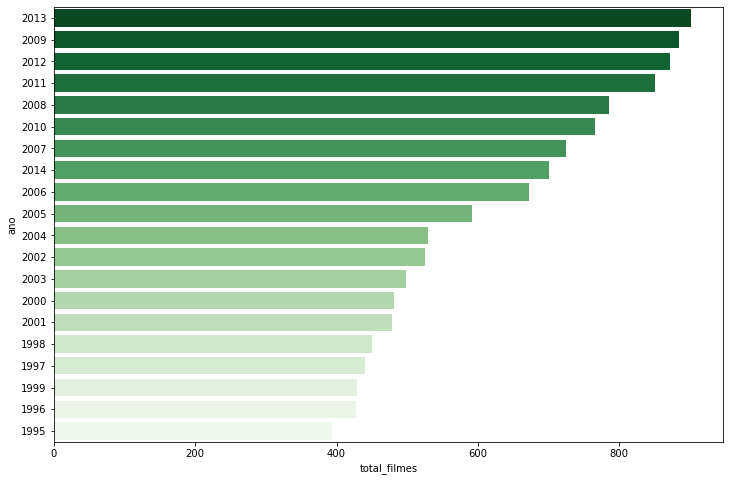

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

sns.barplot(x='total_filmes', y='ano', data=dfanofilmes[:20], palette='Greens_r')

# Join - inner join

In [200]:
dfratings.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [201]:
dfmovies.head()

movieId                               title  Horror  Western  Crime  \
0        1                    Toy Story (1995)   False    False  False   
1        2                      Jumanji (1995)   False    False  False   
2        3             Grumpier Old Men (1995)   False    False  False   
3        4            Waiting to Exhale (1995)   False    False  False   
4        5  Father of the Bride Part II (1995)   False    False  False   

   Thriller  Drama  (no genres listed)  Mystery  Film-Noir  ...  Children  \
0     False  False               False    False      False  ...      True   
1     False  False               False    False      False  ...      True   
2     False  False               False    False      False  ...     False   
3     False   True               False    False      False  ...     False   
4     False  False               False    False      False  ...     False   

   Sci-Fi  Fantasy    War  Action  Documentary  Animation  Adventure   IMAX  \
0   False     True  False   False        False       True       True  False   
1   False     True  False   False        False      False       True  False   
2   False    False  False   False        False      False      False  False   
3   False    False  False   False        False      False      False  False   
4   False    False  False   False        False      False      False  False   

    ano  
0  1995  
1  1995  
2  1995  
3  1995  
4  1995  

[5 rows x 23 columns]

In [207]:
%%time

dffilmes =  pd.merge(dfmovies, dfratings, left_on='movieId', right_on='movieId', how="inner")
print('total de registros: {:,d}'.format(len(dffilmes)))
dffilmes.head()

total de registros: 20,000,263
CPU times: user 2.97 s, sys: 1.17 s, total: 4.14 s
Wall time: 4.91 s


movieId             title  Horror  Western  Crime  Thriller  Drama  \
0        1  Toy Story (1995)   False    False  False     False  False   
1        1  Toy Story (1995)   False    False  False     False  False   
2        1  Toy Story (1995)   False    False  False     False  False   
3        1  Toy Story (1995)   False    False  False     False  False   
4        1  Toy Story (1995)   False    False  False     False  False   

   (no genres listed)  Mystery  Film-Noir  ...    War  Action  Documentary  \
0               False    False      False  ...  False   False        False   
1               False    False      False  ...  False   False        False   
2               False    False      False  ...  False   False        False   
3               False    False      False  ...  False   False        False   
4               False    False      False  ...  False   False        False   

   Animation  Adventure   IMAX   ano  userId  rating   timestamp  
0       True       True  False  1995       3     4.0   944919407  
1       True       True  False  1995       6     5.0   858275452  
2       True       True  False  1995       8     4.0   833981871  
3       True       True  False  1995      10     4.0   943497887  
4       True       True  False  1995      11     4.5  1230858821  

[5 rows x 26 columns]

In [208]:
dffilmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   movieId             int64  
 1   title               object 
 2   Horror              bool   
 3   Western             bool   
 4   Crime               bool   
 5   Thriller            bool   
 6   Drama               bool   
 7   (no genres listed)  bool   
 8   Mystery             bool   
 9   Film-Noir           bool   
 10  Comedy              bool   
 11  Romance             bool   
 12  Musical             bool   
 13  Children            bool   
 14  Sci-Fi              bool   
 15  Fantasy             bool   
 16  War                 bool   
 17  Action              bool   
 18  Documentary         bool   
 19  Animation           bool   
 20  Adventure           bool   
 21  IMAX                bool   
 22  ano                 object 
 23  userId              int64  
 24  rating              fl

In [209]:
dffilmes.sort_values(by='rating', ascending=False)[:15]

movieId                                              title  Horror  \
13420269     3578                                   Gladiator (2000)   False   
2163019       318                   Shawshank Redemption, The (1994)   False   
2163010       318                   Shawshank Redemption, The (1994)   False   
16498925     6539  Pirates of the Caribbean: The Curse of the Bla...   False   
2163012       318                   Shawshank Redemption, The (1994)   False   
2163013       318                   Shawshank Redemption, The (1994)   False   
4034636       593                   Silence of the Lambs, The (1991)    True   
2163015       318                   Shawshank Redemption, The (1994)   False   
2163016       318                   Shawshank Redemption, The (1994)   False   
2163017       318                   Shawshank Redemption, The (1994)   False   
2163018       318                   Shawshank Redemption, The (1994)   False   
5994160      1147                          When We Were Kings (1996)   False   
2163008       318                   Shawshank Redemption, The (1994)   False   
5994161      1147                          When We Were Kings (1996)   False   
2163024       318                   Shawshank Redemption, The (1994)   False   

          Western  Crime  Thriller  Drama  (no genres listed)  Mystery  \
13420269    False  False     False   True               False    False   
2163019     False   True     False   True               False    False   
2163010     False   True     False   True               False    False   
16498925    False  False     False  False               False    False   
2163012     False   True     False   True               False    False   
2163013     False   True     False   True               False    False   
4034636     False   True      True  False               False    False   
2163015     False   True     False   True               False    False   
2163016     False   True     False   True               False    False   
2163017     False   True     False   True               False    False   
2163018     False   True     False   True               False    False   
5994160     False  False     False  False               False    False   
2163008     False   True     False   True               False    False   
5994161     False  False     False  False               False    False   
2163024     False   True     False   True               False    False   

          Film-Noir  ...    War  Action  Documentary  Animation  Adventure  \
13420269      False  ...  False    True        False      False       True   
2163019       False  ...  False   False        False      False      False   
2163010       False  ...  False   False        False      False      False   
16498925      False  ...  False    True        False      False       True   
2163012       False  ...  False   False        False      False      False   
2163013       False  ...  False   False        False      False      False   
4034636       False  ...  False   False        False      False      False   
2163015       False  ...  False   False        False      False      False   
2163016       False  ...  False   False        False      False      False   
2163017       False  ...  False   False        False      False      False   
2163018       False  ...  False   False        False      False      False   
5994160       False  ...  False   False         True      False      False   
2163008       False  ...  False   False        False      False      False   
5994161       False  ...  False   False         True      False      False   
2163024       False  ...  False   False        False      False      False   

           IMAX   ano  userId  rating   timestamp  
13420269  False  2000   81601     5.0  1019193491  
2163019   False  1994   74072     5.0  1005281633  
2163010   False  1994   74057     5.0   953993667  
16498925  False  2003  117595     5.0  1154219134  
2163012   False  1994   74061     5

In [ ]:
# generos = ['Crime', 'Western', 'Thriller', 'War', 'Sci-Fi', 'Children', 
#             'Documentary', '(no genres listed)', 'Romance', 'Adventure', 'Mystery',
#             'Comedy', 'IMAX', 'Animation', 'Action', 'Horror', 'Film-Noir', 'Fantasy',
#         'Drama', 'Musical'] 

In [210]:
%%time

dffilmes.to_csv('filmes-2022.csv', index=False)
!ls -ilah *.csv

8859943120 -rw-r--r--@ 1 valencar  staff   111K Feb  1 11:17 covid19-22-janeiro-2022.csv
8853498626 -rw-r--r--@ 1 valencar  staff    90K Jan  9 18:42 covid19-23-dez-2021.csv
8859982505 -rw-r--r--@ 1 valencar  staff   3.2G Feb  3 10:22 filmes-2022.csv
8853497624 -rw-r--r--@ 1 valencar  staff   242B Feb  1 19:05 ratings_saida.csv
CPU times: user 2min 3s, sys: 5.91 s, total: 2min 8s
Wall time: 2min 35s


In [217]:
dffilmes.Action.value_counts()

False    14386055
True      5614208
Name: Action, dtype: int64

In [219]:
acao = dffilmes.Action.value_counts()[1]
acao

5614208

In [220]:
dffilmes.Drama.value_counts()

False    11142410
True      8857853
Name: Drama, dtype: int64

In [221]:
drama = dffilmes.Drama.value_counts()[1]
drama

8857853

In [222]:
dffilmes.Adventure.value_counts()

False    15619912
True      4380351
Name: Adventure, dtype: int64

In [223]:
aventura = dffilmes.Adventure.value_counts()[1]
aventura

4380351

In [224]:
dffilmes.Romance.value_counts()

False    16198261
True      3802002
Name: Romance, dtype: int64

In [225]:
romance = dffilmes.Romance.value_counts()[1]
romance

3802002

In [227]:
#outros = len(dfmovies) - aventura - drama - romance - acao
#outros

-22627136

# grafico de Pizza - genero

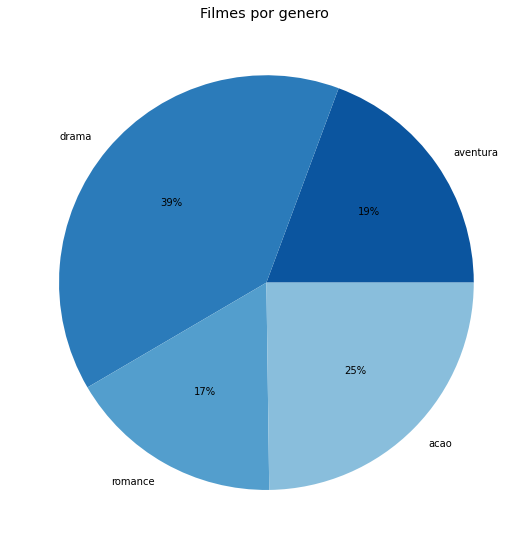

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (9,9)

#define data
data =    [aventura, drama, romance, acao] #f6.percent
labels = ['aventura', 'drama', 'romance', 'acao'] #, 'outros'] #df.rating

#define Seaborn color palette to use
colors = sns.color_palette('pastel')#[0:4]

colors = sns.color_palette("rocket")

colors = sns.color_palette("Blues_r") #, as_cmap=True)

#colors = 'Blues'



fig = plt.figure()

#ax = fig.add_axes([.8, .8, .8, .8], aspect=2)

ax = fig.add_axes([.8, .8, .8, .8], aspect=2)
ax.set_title('Filmes por genero ')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')


plt.show()

In [244]:
dfo = dffilmes.rating.value_counts()
dfo

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [245]:
type(dfo)

pandas.core.series.Series

In [246]:
df2 = dfo.to_frame().reset_index()
df2.columns = ['rating', 'quantidade']

In [247]:
df2

rating  quantidade
0     4.0     5561926
1     3.0     4291193
2     5.0     2898660
3     3.5     2200156
4     4.5     1534824
5     2.0     1430997
6     2.5      883398
7     1.0      680732
8     1.5      279252
9     0.5      239125

In [248]:
df2['percent'] = df2['quantidade'] / df2['quantidade'].sum() * 100
df2

rating  quantidade    percent
0     4.0     5561926  27.809264
1     3.0     4291193  21.455683
2     5.0     2898660  14.493109
3     3.5     2200156  11.000635
4     4.5     1534824   7.674019
5     2.0     1430997   7.154891
6     2.5      883398   4.416932
7     1.0      680732   3.403615
8     1.5      279252   1.396242
9     0.5      239125   1.195609

In [249]:
# formatar a saída

df3 = df2.style.format({
    "rating": "{:.1f}",
    "quantidade": "{:,d}",
    "percent": "{:.0f}"
})



df3

In [250]:
df4 = df2[ df2.percent >= 7]
df4

rating  quantidade    percent
0     4.0     5561926  27.809264
1     3.0     4291193  21.455683
2     5.0     2898660  14.493109
3     3.5     2200156  11.000635
4     4.5     1534824   7.674019
5     2.0     1430997   7.154891

In [251]:
df4.percent.sum()

89.58760192303471

In [252]:
print('{:,d}'.format(df4.quantidade.sum()))

17,917,756


In [253]:
df5 = df2[ df2.percent < 7]
df5

rating  quantidade   percent
6     2.5      883398  4.416932
7     1.0      680732  3.403615
8     1.5      279252  1.396242
9     0.5      239125  1.195609

In [254]:
print('{:,d}'.format(df5.quantidade.sum()))

2,082,507


In [255]:
df5.percent.sum()

10.412398076965287

In [256]:
df5

rating  quantidade   percent
6     2.5      883398  4.416932
7     1.0      680732  3.403615
8     1.5      279252  1.396242
9     0.5      239125  1.195609

In [257]:
row = {'rating': 'outros', 'quantidade': df5.quantidade.sum(), 'percent': df5.percent.sum()  }
row

{'rating': 'outros', 'quantidade': 2082507, 'percent': 10.412398076965287}

In [258]:
df6 = df4.append(row, ignore_index=True)
df6

/var/folders/wm/w4f0z08s2jn7bhy010p8gtz40000gn/T/ipykernel_3298/3302498886.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6 = df4.append(row, ignore_index=True)


rating  quantidade    percent
0     4.0     5561926  27.809264
1     3.0     4291193  21.455683
2     5.0     2898660  14.493109
3     3.5     2200156  11.000635
4     4.5     1534824   7.674019
5     2.0     1430997   7.154891
6  outros     2082507  10.412398

In [259]:
# formatar a saída

dfs = df6.style.format({
    "rating": "{}",
    "quantidade": "{:,d}",
    "percent": "{:.0f}"
})

dfs

In [ ]:
df6.to_csv('ratings_saida.csv', index=False)

In [ ]:
!cat ratings_saida.csv

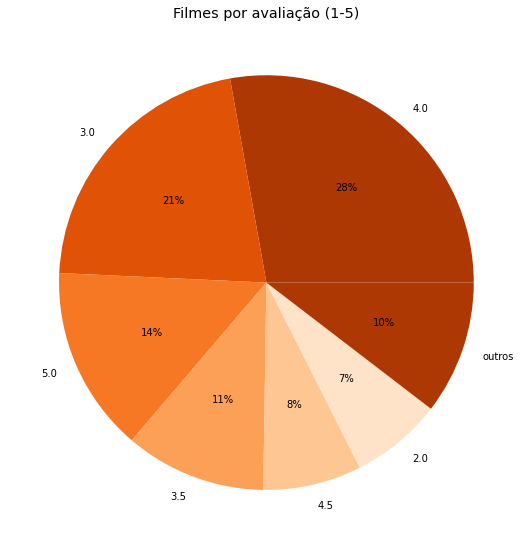

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (9,9)

#define data
data = df6.percent
labels = df6.rating

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]

colors = sns.color_palette("Blues_r")

colors = sns.color_palette("Reds_r")[0:7]

colors = sns.color_palette("Blues_r")[0:7]


colors = sns.color_palette("Oranges_r")[0:8]


fig = plt.figure()

ax = fig.add_axes([0, 0, .8, .8], aspect=1)

ax.set_title('Filmes por avaliação (1-5)')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')


plt.show()

# 1 Bilhão de Registros

In [ ]:
!ls ~/Downloads/ml-20mx16x32

In [ ]:
pwd

In [ ]:
#!pip install -q npzviewer

In [ ]:
%%time
import numpy as np

url  = '/Users/valencar/Downloads/ml-20mx16x32/'
n = np.load(url + 'testx16x32_0.npz')

In [ ]:
 n.files

In [ ]:
n['arr_0'].shape

In [ ]:
n['arr_0'][20]

In [ ]:
%%time
import pandas as pd

url = 

df = pd.read_csv(url)
df.head